In [1]:
import csv
import cv2
import numpy as np
import os
from scipy import ndimage, misc
import re
from matplotlib import pyplot as plt

images = []
images_m = []

file_names= []
for root, dirnames, filenames in os.walk("data/IMG"):
    for filename in filenames:
        if re.search("(center)", filename):
            filepath = os.path.join(root, filename)
            image = ndimage.imread(filepath, mode="RGB")
            image_m = cv2.flip(image, 1)
            images.append(image)
            images_m.append(image_m)
            file_names.append(filename)
"""
        if re.search("(left)", filename):
            filepath = os.path.join(root, filename)
            image = ndimage.imread(filepath, mode="RGB")
            images.append(image)
            images_m.append(image_m)
            file_names.append(filename)

        if re.search("(right)", filename):
            filepath = os.path.join(root, filename)
            image = ndimage.imread(filepath, mode="RGB")
            images.append(image)
            images_m.append(image_m)
            file_names.append(filename)
"""


lines = []
with open('data/driving_log.csv') as csvfile:
    reader =csv.reader(csvfile)
    for line in reader:
        lines.append(line)

measurements = []
for line in lines:
    measurement = float(line[3])
    measurements.append(measurement)

    




Index: 2158
Steering of the original image: -0.000700177
Sterring of the flipped image: 0.000700177
Number of Training Samples: 7054
Number of Labels: 7054


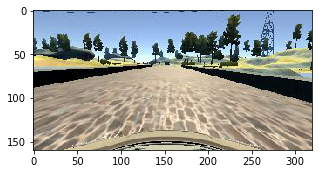

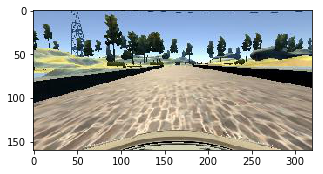

In [2]:
import random
images_aug = images + images_m

measurements_m = list(np.negative(measurements))
measurements_aug = measurements + measurements_m

y_train = np.array(measurements_aug)
X_train = np.array(images_aug)


%matplotlib inline

index = random.randint(0, len(measurements))
index2 = index + len(measurements)

imagesample = images_aug[index].squeeze()
imagesample2 = images_aug[index2].squeeze()
plt.figure(figsize=(5,5))
plt.imshow(imagesample)
plt.figure(figsize=(5,5))
plt.imshow(imagesample2)

print("Index:", index)
print("Steering of the original image:", y_train[index])
print("Sterring of the flipped image:", y_train[index2])



print("Number of Training Samples:", len(X_train))
print("Number of Labels:", len(y_train))


In [3]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.convolutional import Convolution2D

model = Sequential()
model.add(Lambda(lambda x:x/255.0 - 0.5, input_shape=(160,320,3)))
##model.add(Cropping2D(cropping=((75,25), (0,0))))
model.add(Convolution2D(24,5,5, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Convolution2D(36,5,5, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Convolution2D(48,5,5, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Convolution2D(64,3,3, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Convolution2D(64,3,3, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1164))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))



model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch = 7)

model.save('model.h5')
print("Model saved")



Using TensorFlow backend.


Train on 5643 samples, validate on 1411 samples
Epoch 1/7
5643/5643 [==============================] - 1577s - loss: 0.0853 - val_loss: 0.0980
Epoch 2/7
5643/5643 [==============================] - 1180s - loss: 0.0177 - val_loss: 0.1127
Epoch 3/7
5643/5643 [==============================] - 1010s - loss: 0.0142 - val_loss: 0.0808
Epoch 4/7
5643/5643 [==============================] - 2997s - loss: 0.0124 - val_loss: 0.0796
Epoch 5/7
5643/5643 [==============================] - 1041s - loss: 0.0115 - val_loss: 0.0922
Epoch 6/7
5643/5643 [==============================] - 1016s - loss: 0.0109 - val_loss: 0.1152
Epoch 7/7
5643/5643 [==============================] - 989s - loss: 0.0098 - val_loss: 0.0865
Model saved
